## Ozone Predictor: Deep Learning Ozone Hole Prediction

# Imporing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Datasets

In [2]:
antarctic_ozone = pd.read_csv('antarctic-ozone-hole-area.csv')
nasa1 = pd.read_csv('NasaOzoneWatch_1.csv')
nasa2 = pd.read_csv('NasaOzoneWatch_2.csv')
odgi1 = pd.read_csv('odgi_table1.csv')
odgi2 = pd.read_csv('odgi_table2.csv')

In [3]:
# Keep only valid years (numeric values)
odgi1 = odgi1[pd.to_numeric(odgi1['Year'], errors='coerce').notnull()]
odgi2 = odgi2[pd.to_numeric(odgi2['Year'], errors='coerce').notnull()]

# Convert Year columns to int
odgi1['Year'] = odgi1['Year'].astype(int)
odgi2['Year'] = odgi2['Year'].astype(int)

In [4]:
odgi1.head()  

,Year,CFC-12,CFC-11,CH3Cl,CH3Br,CCl4,CH3CCl3,halons,CFC-113,HCFCs,WMO Minor,SUM* (ppt),EESC SUM (ppt),ODGI(old) Antarctic,ODGI(new) Antarctic
0,1992,861.0,789.0,500.0,583.0,431.0,400.0,346.0,215.0,41.0,18.0,4184.0,3544.0,97.7,69.6
1,1993,876.0,795.0,500.0,583.0,429.0,393.0,368.0,219.0,44.0,18.0,4226.0,3666.0,99.0,75.7
2,1994,885.0,796.0,501.0,583.0,425.0,370.0,394.0,224.0,48.0,18.0,4244.0,3784.0,100.0,81.6
3,1995,895.0,793.0,508.0,583.0,422.0,333.0,416.0,226.0,53.0,19.0,4248.0,3888.0,99.4,86.8
4,1996,907.0,789.0,500.0,585.0,418.0,296.0,427.0,227.0,59.0,19.0,4227.0,3974.0,99.2,91.1


In [5]:
odgi2.head()

,Year,CFC-12,CFC-11,CH3Cl,CH3Br,CCl4,CH3CCl3,halons,CFC-113,HCFCs,WMO Minor,SUM* (ppt),EESC SUM (ppt; new),ODGI(old) Mid Latitude,ODGI(new) Mid-Lat
0,1992,230.0,375.0,242.0,326.0,242.0,271.0,172.0,69.0,13.0,6.0,1945.0,1795.0,98.8,82.0
1,1993,234.0,377.0,242.0,326.0,240.0,266.0,184.0,71.0,14.0,6.0,1961.0,1846.0,99.7,88.6
2,1994,237.0,378.0,242.0,326.0,238.0,250.0,196.0,72.0,16.0,6.0,1961.0,1888.0,100.0,94.0
3,1995,239.0,377.0,246.0,326.0,236.0,225.0,207.0,73.0,18.0,6.0,1953.0,1917.0,98.4,97.6
4,1996,242.0,375.0,242.0,327.0,234.0,200.0,213.0,73.0,20.0,7.0,1933.0,1932.0,97.4,99.6


In [6]:
odgi1.describe()

,Year,CFC-12,CFC-11,CH3Cl,CH3Br,CCl4,CH3CCl3,halons,CFC-113,HCFCs,WMO Minor,SUM* (ppt),EESC SUM (ppt),ODGI(old) Antarctic,ODGI(new) Antarctic
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2008.00000,897.242424,726.181818,497.606061,493.939394,364.515152,100.939394,455.969697,206.363636,110.272727,17.333333,3870.333333,3894.090909,53.603030,87.133333
std,9.66954,31.131807,49.276297,5.476880,65.982450,43.278980,128.537674,41.400094,14.859379,37.466879,2.160247,263.835255,191.117661,46.919922,9.559539
min,1992.00000,832.000000,641.000000,490.000000,415.000000,294.000000,3.000000,346.000000,181.000000,41.000000,14.000000,3438.000000,3544.000000,0.000000,69.600000
25%,2000.00000,876.000000,684.000000,493.000000,430.000000,327.000000,8.000000,427.000000,194.000000,81.000000,15.000000,3661.000000,3735.000000,0.000000,79.200000
50%,2008.00000,904.000000,724.000000,497.000000,481.000000,366.000000,35.000000,467.000000,208.000000,116.000000,18.000000,3869.000000,3902.000000,85.800000,87.500000
75%,2016.00000,926.000000,773.000000,500.000000,572.000000,402.000000,149.000000,490.000000,219.000000,147.000000,19.000000,4133.000000,4069.000000,95.400000,95.900000
max,2024.00000,934.000000,796.000000,513.000000,596.000000,431.000000,400.000000,505.000000,227.000000,153.000000,21.000000,4248.000000,4151.000000,100.000000,100.000000


In [7]:
odgi2.describe()

,Year,CFC-12,CFC-11,CH3Cl,CH3Br,CCl4,CH3CCl3,halons,CFC-113,HCFCs,WMO Minor,SUM* (ppt),EESC SUM (ppt; new),ODGI(old) Mid Latitude,ODGI(new) Mid-Lat
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2008.00000,240.000000,344.787879,240.606061,276.363636,204.060606,68.363636,224.181818,66.454545,38.000000,6.030303,1708.818182,1736.484848,49.663636,74.372727
std,9.66954,8.396428,23.366319,2.633194,36.882260,24.273107,86.899661,22.122464,4.809437,13.152946,1.045372,159.485394,140.384098,44.053056,18.130228
min,1992.00000,222.000000,304.000000,237.000000,232.000000,164.000000,2.000000,172.000000,58.000000,13.000000,4.000000,1474.000000,1511.000000,0.000000,45.300000
25%,2000.00000,234.000000,325.000000,239.000000,241.000000,183.000000,6.000000,207.000000,62.000000,28.000000,5.000000,1580.000000,1610.000000,0.000000,58.000000
50%,2008.00000,242.000000,344.000000,240.000000,269.000000,205.000000,24.000000,227.000000,67.000000,40.000000,6.000000,1691.000000,1740.000000,72.600000,74.800000
75%,2016.00000,248.000000,367.000000,242.000000,320.000000,225.000000,101.000000,244.000000,71.000000,51.000000,7.000000,1852.000000,1866.000000,89.300000,91.100000
max,2024.00000,250.000000,378.000000,248.000000,333.000000,242.000000,271.000000,251.000000,73.000000,53.000000,8.000000,1961.000000,1935.000000,100.000000,100.000000


In [8]:
# Checking for NaN values and filling them
odgi1 = odgi1.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
odgi2 = odgi2.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_11844\439402631.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  odgi1 = odgi1.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_11844\439402631.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  odgi2 = odgi2.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


In [9]:
odgi1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 33 non-null     int64  
 1   CFC-12               33 non-null     float64
 2   CFC-11               33 non-null     float64
 3   CH3Cl                33 non-null     float64
 4   CH3Br                33 non-null     float64
 5   CCl4                 33 non-null     float64
 6   CH3CCl3              33 non-null     float64
 7   halons               33 non-null     float64
 8   CFC-113              33 non-null     float64
 9   HCFCs                33 non-null     float64
 10  WMO Minor            33 non-null     float64
 11  SUM* (ppt)           33 non-null     float64
 12  EESC SUM (ppt)       33 non-null     float64
 13  ODGI(old) Antarctic  33 non-null     float64
 14  ODGI(new) Antarctic  33 non-null     float64
dtypes: float64(14), int64(1)
memory usage: 4.1 KB


In [10]:
odgi2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    33 non-null     int64  
 1   CFC-12                  33 non-null     float64
 2   CFC-11                  33 non-null     float64
 3   CH3Cl                   33 non-null     float64
 4   CH3Br                   33 non-null     float64
 5   CCl4                    33 non-null     float64
 6   CH3CCl3                 33 non-null     float64
 7   halons                  33 non-null     float64
 8   CFC-113                 33 non-null     float64
 9   HCFCs                   33 non-null     float64
 10  WMO Minor               33 non-null     float64
 11  SUM* (ppt)              33 non-null     float64
 12  EESC SUM (ppt; new)     33 non-null     float64
 13  ODGI(old) Mid Latitude  33 non-null     float64
 14  ODGI(new) Mid-Lat       33 non-null     float64
d

In [11]:
# Aligning year columns  for all datasets
antarctic_ozone['Year'] = antarctic_ozone['Year'].astype(int)
nasa2['Year'] = nasa2['Year'].astype(int)

In [12]:
antarctic_ozone['max_ozone_area_mil'] = antarctic_ozone['Maximum ozone hole area'] / 1e6
antarctic_ozone['mean_ozone_area_mil'] = antarctic_ozone['Mean ozone hole area'] / 1e6

merged = antarctic_ozone[['Year', 'max_ozone_area_mil', 'mean_ozone_area_mil']].merge(
    nasa2.rename(columns={'Ozone Hole area mean (mil km2)': 'nasa_mean_ozone_area', 'Minimum Ozone (DU)': 'nasa_min_ozone'}),
    on='Year', how='inner'
).merge(
    odgi1[['Year', 'EESC SUM (ppt)', 'ODGI(new) Antarctic']].rename(
        columns={'EESC SUM (ppt)': 'EESC_SUM_Antarctic', 'ODGI(new) Antarctic': 'ODGI_new_Antarctic'}
    ),
    on='Year', how='left'
).merge(
    odgi2[['Year', 'EESC SUM (ppt; new)', 'ODGI(new) Mid-Lat']].rename(
        columns={'EESC SUM (ppt; new)': 'EESC_SUM_MidLat', 'ODGI(new) Mid-Lat': 'ODGI_new_MidLat'}
    ),
    on='Year', how='left'
)   

In [13]:
merged

,Year,max_ozone_area_mil,mean_ozone_area_mil,nasa_mean_ozone_area,nasa_min_ozone,EESC_SUM_Antarctic,ODGI_new_Antarctic,EESC_SUM_MidLat,ODGI_new_MidLat
0,1979,1.1,0.1,0.1,225.0,NaN,NaN,NaN,NaN
1,1980,3.3,1.4,1.4,203.0,NaN,NaN,NaN,NaN
2,1981,3.1,0.6,0.6,209.5,NaN,NaN,NaN,NaN
3,1982,10.8,4.8,4.8,185.0,NaN,NaN,NaN,NaN
4,1983,12.2,7.9,7.9,172.9,NaN,NaN,NaN,NaN
5,1984,14.7,10.1,10.1,163.6,NaN,NaN,NaN,NaN
6,1985,18.8,14.2,14.2,146.5,NaN,NaN,NaN,NaN
7,1986,14.4,11.3,11.3,157.8,NaN,NaN,NaN,NaN
8,1987,22.5,19.3,19.3,123.0,NaN,NaN,NaN,NaN
9,1988,13.8,10.0,10.0,171.0,NaN,NaN,NaN,NaN


In [14]:
# Save the final merged dataframe to a new CSV file
merged.to_csv('ozone_data_for_tableau.csv', index=False)

# Visualzing Trends

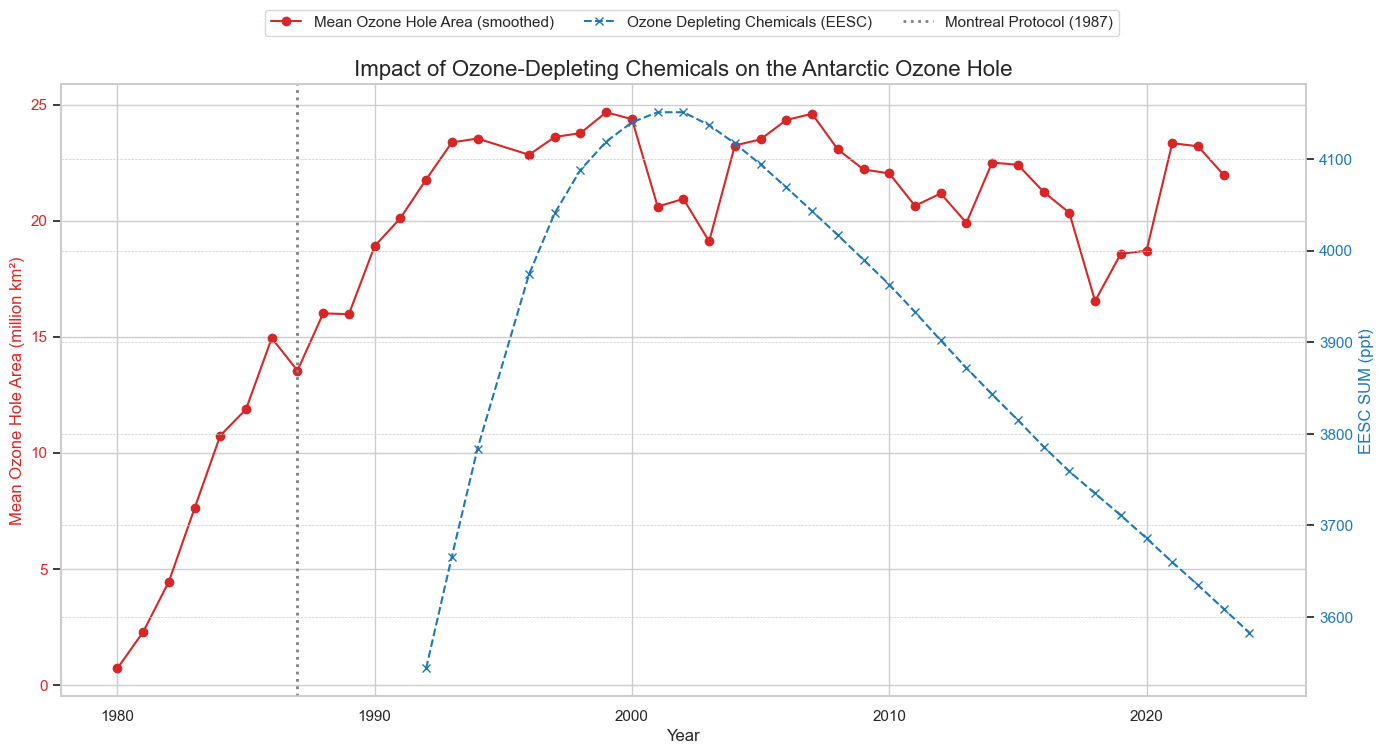

In [15]:
import seaborn as sns

# Set a modern plot style
sns.set_theme(style="whitegrid")

# --- Create the plot ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- Plot 1: Ozone Hole Area (The Effect) on the left Y-axis ---
# Using a rolling average to smooth out the year-to-year noise and show the trend
ax1.plot(merged['Year'], merged['mean_ozone_area_mil'].rolling(window=3, center=True).mean(), 
         color='tab:red', marker='o', linestyle='-', label='Mean Ozone Hole Area (smoothed)')

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Mean Ozone Hole Area (million km²)', color='tab:red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:red')

# --- Plot 2: EESC (The Cause) on the right Y-axis ---
# Create a second Y-axis that shares the same X-axis
ax2 = ax1.twinx()
ax2.plot(merged['Year'], merged['EESC_SUM_Antarctic'], 
         color='tab:blue', marker='x', linestyle='--', label='Ozone Depleting Chemicals (EESC)')
ax2.set_ylabel('EESC SUM (ppt)', color='tab:blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# --- Add context and labels ---
# Add a vertical line to mark the Montreal Protocol
plt.axvline(x=1987, color='grey', linestyle=':', linewidth=2, label='Montreal Protocol (1987)')

plt.title('Impact of Ozone-Depleting Chemicals on the Antarctic Ozone Hole', fontsize=16)
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 0.95), ncol=3)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.9]) # Adjust layout to make space for the legend
plt.show()

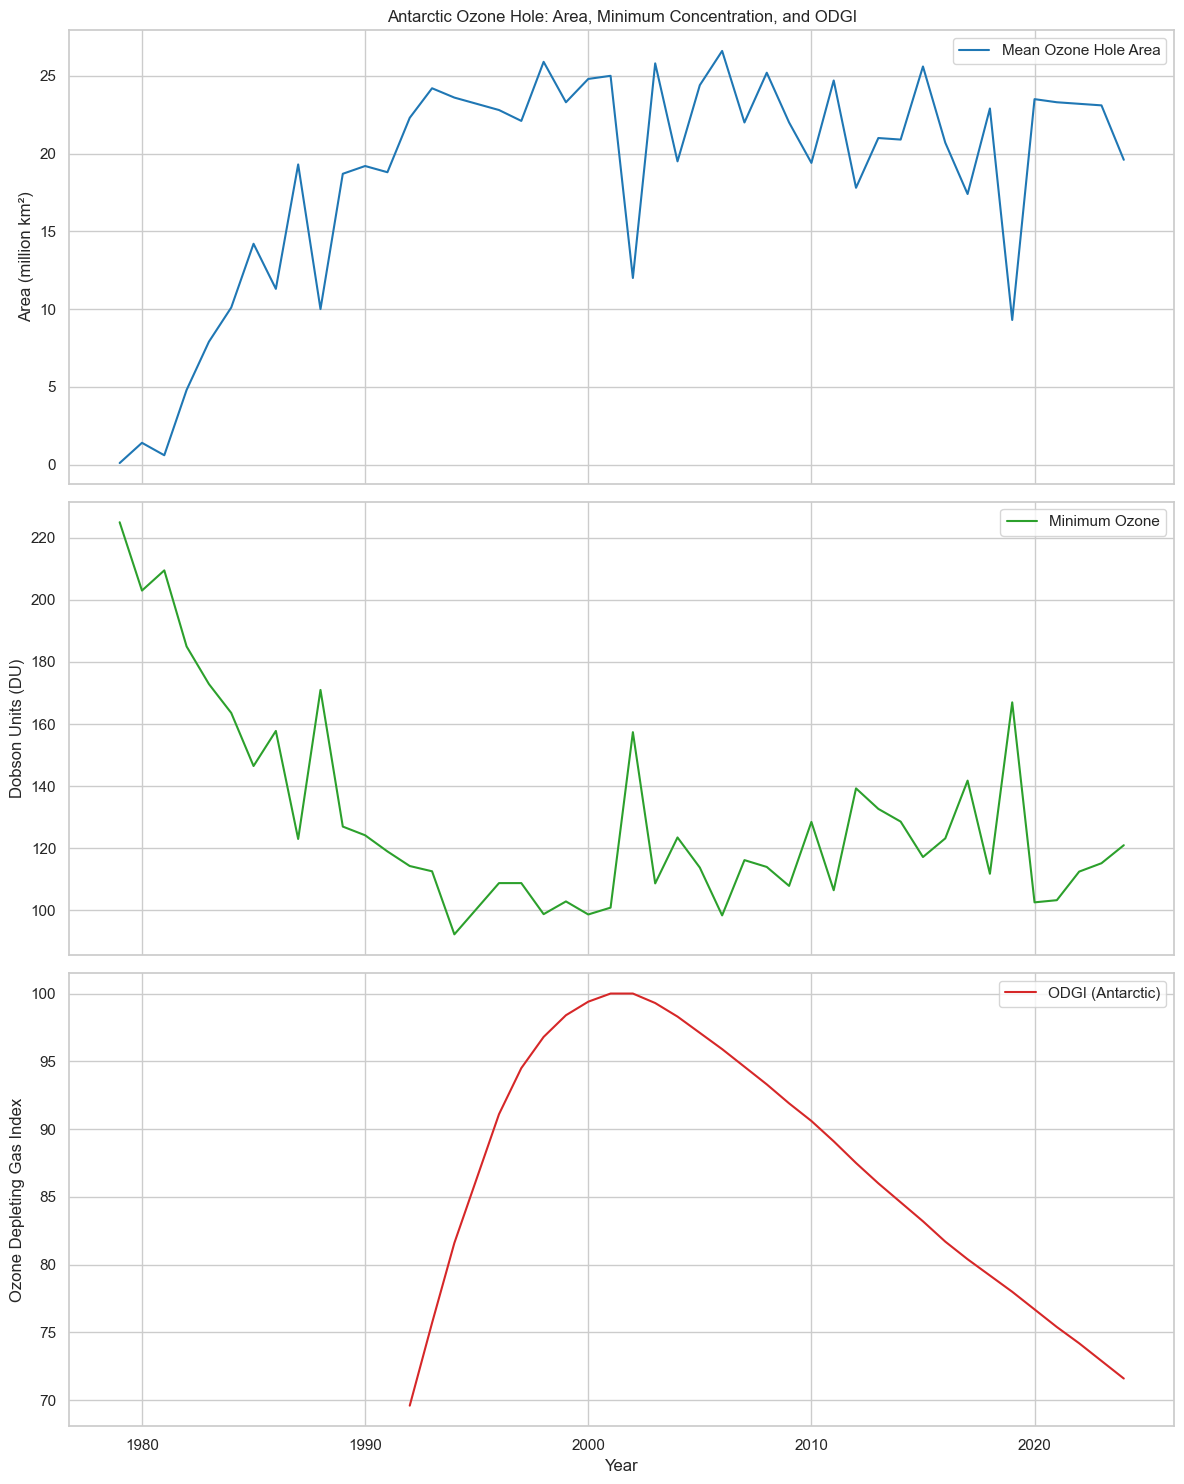

In [16]:
# Set a modern plot style
sns.set_theme(style="whitegrid")

# Create a figure with 3 subplots that share the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# --- Plot 1: Mean Ozone Hole Area ---
ax1.plot(merged['Year'], merged['mean_ozone_area_mil'], color='tab:blue', label='Mean Ozone Hole Area')
ax1.set_ylabel('Area (million km²)')
ax1.set_title('Antarctic Ozone Hole: Area, Minimum Concentration, and ODGI')
ax1.legend()
ax1.grid(True)

# --- Plot 2: Minimum Ozone Concentration ---
# This shows how thin the ozone layer gets. A lower number is worse.
ax2.plot(merged['Year'], merged['nasa_min_ozone'], color='tab:green', label='Minimum Ozone')
ax2.set_ylabel('Dobson Units (DU)')
ax2.legend()
ax2.grid(True)

# --- Plot 3: Ozone Depleting Gas Index ---
ax3.plot(merged['Year'], merged['ODGI_new_Antarctic'], color='tab:red', label='ODGI (Antarctic)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Ozone Depleting Gas Index')
ax3.legend()
ax3.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Model building

In [17]:
features = 'EESC_SUM_Antarctic'
target = 'mean_ozone_area_mil'

model_data = merged[[features, target]].dropna()


In [18]:
from sklearn.preprocessing import MinMaxScaler

# --- Step 1.2: Scale the Data ---

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_data)

scaled_data


array([[0.        , 0.75144509],
       [0.20098847, 0.86127168],
       [0.39538715, 0.8265896 ],
       [0.70840198, 0.78034682],
       [0.81878089, 0.73988439],
       [0.89621087, 0.95953757],
       [0.94728171, 0.80924855],
       [0.98187809, 0.89595376],
       [1.        , 0.90751445],
       [1.        , 0.15606936],
       [0.97693575, 0.95375723],
       [0.94398682, 0.58959538],
       [0.90609555, 0.87283237],
       [0.86490939, 1.        ],
       [0.82207578, 0.73410405],
       [0.77924217, 0.91907514],
       [0.73476112, 0.73410405],
       [0.69028007, 0.58381503],
       [0.64085667, 0.89017341],
       [0.58978583, 0.49132948],
       [0.54036244, 0.67630058],
       [0.49258649, 0.67052023],
       [0.44645799, 0.94219653],
       [0.39868204, 0.65895954],
       [0.35420099, 0.46820809],
       [0.31466227, 0.78612717],
       [0.27512356, 0.        ],
       [0.2339374 , 0.82080925],
       [0.19110379, 0.80924855],
       [0.14991763, 0.80346821],
       [0.

In [19]:
import numpy as np

# --- Step 1.3: Create Time Series Sequences ---

def create_sequences(data, look_back=3):
    """
    Creates sequences of data for LSTM.
    'look_back' is the number of previous time steps to use as input variables (X)
    to predict the next time period (y).
    """
    X, y = [], []
    for i in range(len(data) - look_back):
        # The features are the sequence of 'look_back' days
        X.append(data[i:(i + look_back), :-1]) # All columns except the last one (target)
        # The target is the 'Mean ozone hole area' on the next day
        y.append(data[i + look_back, -1]) # The last column
    return np.array(X), np.array(y)

# Let's use a look_back period of 3 years
look_back = 3
X, y = create_sequences(scaled_data, look_back)

print("Shape of X (input sequences):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (input sequences): (29, 3, 1)
Shape of y (target): (29,)


In [20]:
# --- Step 1.4: Train-Test Split ---

# Let's use 80% of the data for training and 20% for testing
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 23
Test set size: 6


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Step 2: Building the LSTM Model ---

# The input shape is (look_back, number_of_features)
input_shape = (X_train.shape[1], X_train.shape[2])

model = Sequential()

# Add an LSTM layer with 50 units
# 'return_sequences=True' is needed if you stack LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
model.add(Dropout(0.2)) # Dropout for regularization

# Add a second LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add a Dense output layer with 1 neuron (to predict our single target value)
model.add(Dense(units=1))

# Display the model's architecture
model.summary()

c:\Users\Vaishnavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# --- Step 3: Compiling and Training the Model ---

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# We use the test data for validation to monitor performance on unseen data during training
history = model.fit(
    X_train,
    y_train,
    epochs=150, # Number of times to iterate over the entire dataset
    batch_size=8, # Number of samples per gradient update
    validation_data=(X_test, y_test),
    verbose=1 # Show training progress
)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 667ms/step - loss: 0.5826 - val_loss: 0.4579
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.5107 - val_loss: 0.4210
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.4398 - val_loss: 0.3828
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.3609 - val_loss: 0.3423
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.3134 - val_loss: 0.2985
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.2345 - val_loss: 0.2524
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1597 - val_loss: 0.2065
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0874 - val_loss: 0.1644
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0731 - val_loss: 0.1319
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0595 - val_loss: 0.1146
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0792 - val_loss: 0.1098
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0935 - v

In [23]:
# --- Step 4.1: Making Predictions and Inverse Scaling ---

# Make predictions on the test set
predicted_scaled = model.predict(X_test)

# To inverse transform, we need to create an array of the same shape as the scaler expects
# (number_of_samples, number_of_features + 1)
num_features = model_data.shape[1] - 1
# Create a dummy array with zeros
dummy_array_pred = np.zeros((len(predicted_scaled), num_features + 1))
# Place our scaled predictions into the last column (the target column)
dummy_array_pred[:, -1] = predicted_scaled.ravel()
# Inverse transform
predictions = scaler.inverse_transform(dummy_array_pred)[:, -1]


# Do the same for the actual test values (y_test)
dummy_array_actual = np.zeros((len(y_test), num_features + 1))
dummy_array_actual[:, -1] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, -1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


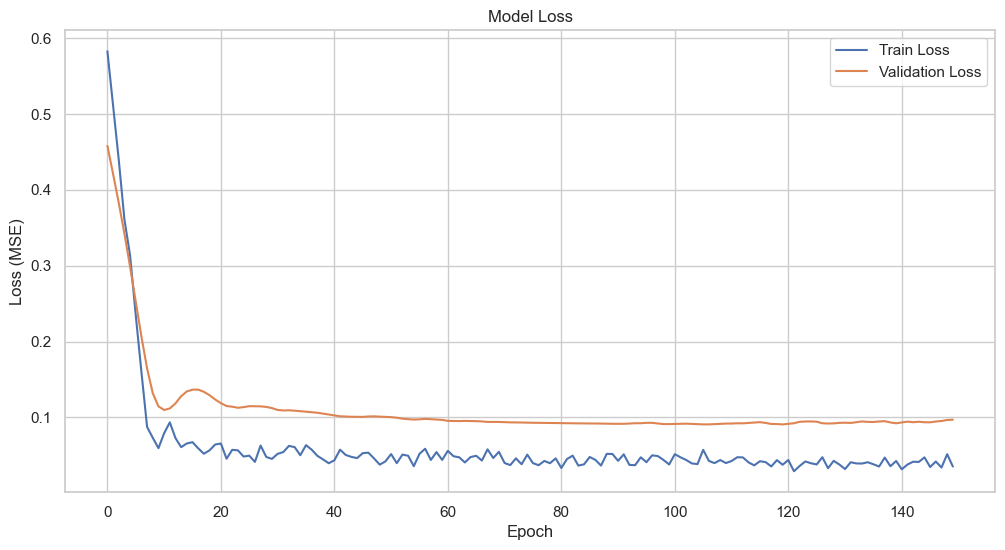

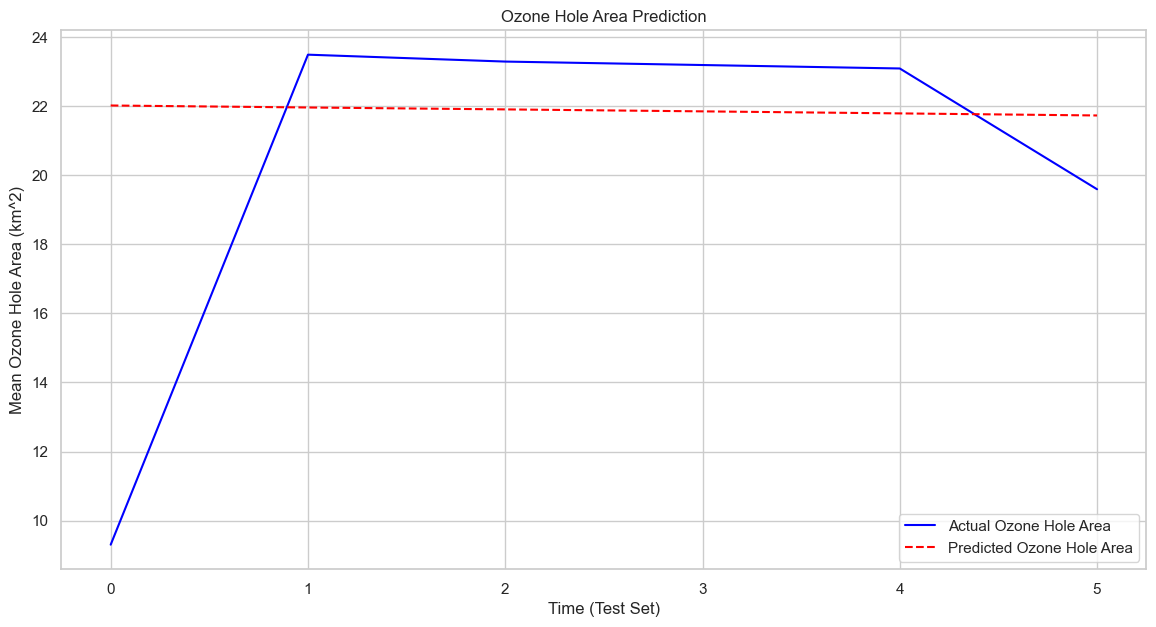

Root Mean Squared Error (RMSE): 5 km^2


In [24]:
import matplotlib.pyplot as plt

# --- Step 4.2: Visualizing the Results ---

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Actual Ozone Hole Area')
plt.plot(predictions, color='red', linestyle='--', label='Predicted Ozone Hole Area')
plt.title('Ozone Hole Area Prediction')
plt.xlabel('Time (Test Set)')
plt.ylabel('Mean Ozone Hole Area (km^2)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate some error metric
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:,.0f} km^2")

In [27]:
import pickle

# Save the trained model to file
with open("ozone_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [28]:
# Save the scaler to a file
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
